## Instamarket

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
You are the owner of a big retail company called Instamarket. Instamarket is a prominent retail chain with a vast global presence, it has a large number of stores across the world. Each store is responsible for delivering orders directly to customers' homes. However, a significant challenge facing your company revolves around optimizing the order-picking process. Certain stores are experiencing long times in fulfilling orders, leading to delays in deliveries. Other stores process orders exceptionally, resulting in an underutilization of employees. Your goal as the owner of Instamarket is to enhance your employee's productivity, capitalize on opportunities to increase order throughput and mitigate delays in stores where prolonged processing times are tarnishing customer service perceptions. Fortunately, all Instamarket stores save the optimal estimated time for delivering an order and the actual time that the order took to be delivered. (We will provide you all the data that Instamarket owns)

As an ML engineer and Instamarket owner, you want to describe the whole solution for your TI team. From creating the ML model, pipelines for training, outliers cleaning, etc. The description must be detailed since your team is responsible for developing the project. The description should contain: Which ML model will you use? A graphical schema showing the proposal How much time you and your team would spend on this project


### 2) Data Collection
- Dataset Source - https://drive.google.com/file/d/1WTSoktGIVNhHhsZX9i-iBTA2CM_8EP1E/view?usp=sharing
- The data consists of 6 column and 337152 rows.

### 2.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

os.chdir("../")
%pwd

'c:\\Users\\anfe1\\OneDrive\\Escritorio\\Instaleap\\Instamarket'

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('artifacts/data.csv')

#### Converting time_picking's to datetime DType

In [4]:
datetime_cols = ["actual_start_time_picking",
                 "actual_end_time_picking",
                 "optimal_start_time_picking",
                 "optimal_end_time_picking"]
df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime, format="mixed")

df

,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking
0,732eec9f-fc84-4d20-86b9-fe357a0976bb,79a83c1b-59dd-412e-af07-5fda4a5bb261,2024-03-05 19:51:56.143000+00:00,2024-03-05 19:52:12.299000+00:00,2024-03-05 21:03:00+00:00,2024-03-05 21:08:00+00:00
1,115ee3df-80e2-4c17-a5e9-29bcae08fe01,c8b6daa6-63fa-4a7a-80ec-1980b9895fd4,2024-03-04 23:28:00.364000+00:00,2024-03-04 23:52:55.154000+00:00,2024-03-04 23:28:00+00:00,2024-03-04 23:32:00+00:00
2,6a54da8e-9ba7-4f0a-a143-d7711eb6b5e7,ae98ef17-dd5d-4459-afb6-47631e6c64b9,2024-03-04 23:24:34.852000+00:00,2024-03-05 03:14:43.896000+00:00,2024-03-04 23:29:00+00:00,2024-03-05 00:08:00+00:00
3,ab0c60c6-1935-4f1d-a80a-25d0e9e8fbb7,12dcc93b-da53-48f3-abb5-b2bfd873745b,2024-03-05 00:37:04.803000+00:00,2024-03-05 00:57:51.608000+00:00,2024-03-05 00:42:00+00:00,2024-03-05 00:45:00+00:00
4,3f298c0f-d807-4d26-9908-8c3f3f2b369a,efae594a-3fdf-4e13-a71c-a53c7185888f,2024-03-05 00:59:40.621000+00:00,2024-03-05 01:04:45.473000+00:00,2024-03-05 01:04:00+00:00,2024-03-05 01:06:00+00:00
...,...,...,...,...,...,...
337147,43ccc4f4-771b-4b61-a93b-195a54eec76f,e786bb75-985d-4590-96ec-ffb540008247,2024-03-02 15:50:27.031000+00:00,2024-03-02 16:21:09.532000+00:00,2024-03-02 16:30:00+00:00,2024-03-02 17:12:00+00:00
337148,43ccc4f4-771b-4b61-a93b-195a54eec76f,8c0b3b2b-7d79-4813-9e9b-51d8189bfdb5,2024-03-01 23:41:00.936000+00:00,2024-03-02 00:18:27.371000+00:00,2024-03-01 23:20:00+00:00,2024-03-02 00:17:00+00:00
337149,43ccc4f4-771b-4b61-a93b-195a54eec76f,0bc84040-7311-4b07-8913-91c35d102b4a,2024-03-02 17:15:43.480000+00:00,2024-03-02 17:42:51.704000+00:00,2024-03-02 18:02:00+00:00,2024-03-02 18:17:00+00:00
337150,43ccc4f4-771b-4b61-a93b-195a54eec76f,269c6f53-e083-43bd-86fa-b1a8f1d86f40,2024-03-02 19:13:54.890000+00:00,2024-03-02 20:41:01.803000+00:00,2024-03-02 21:11:00+00:00,2024-03-02 21:56:00+00:00


### 2.2 Dataset information

- store_id
- job_id
- actual_start_time_picking
- actual_end_time_picking
- optimal_start_time_picking
- optimal_end_time_picking

### 3. Data Checks to perform

- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

store_id                          0
job_id                            0
actual_start_time_picking     23378
actual_end_time_picking       37408
optimal_start_time_picking        0
optimal_end_time_picking          0
dtype: int64

The are missing values for:

- actual_start_time_picking: 23378
- actual_end_time_picking: 37408

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicates values in the data set

### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337152 entries, 0 to 337151
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   store_id                    337152 non-null  object             
 1   job_id                      337152 non-null  object             
 2   actual_start_time_picking   313774 non-null  datetime64[ns, UTC]
 3   actual_end_time_picking     299744 non-null  datetime64[ns, UTC]
 4   optimal_start_time_picking  337152 non-null  datetime64[ns, UTC]
 5   optimal_end_time_picking    337152 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](4), object(2)
memory usage: 15.4+ MB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

store_id                         741
job_id                        337152
actual_start_time_picking     254783
actual_end_time_picking       299663
optimal_start_time_picking     12195
optimal_end_time_picking       11933
dtype: int64

- There are 741 stores in Instamarket
- There is a unique job_id for each order
- Picking times (both optimal and actual) have lesser unique values which could mean that some orders share the same time 

### 3.5 Exploring Data

In [9]:
print("Categories in 'store_id' variable:")
counts_per_store = df['store_id'].value_counts(sort=True)
print(counts_per_store)

Categories in 'store_id' variable:
store_id
4d1c5d32-b237-4954-bccd-72300987dceb    2221
52ecd401-0fcd-49cd-900d-13feb35690b3    2061
9912aaf6-741f-4278-9fe2-25530ebb97dd    1688
272aae2c-be43-4601-a336-5ba2c510eeee    1617
dc8aac0b-d280-4696-bcf4-bead331015ad    1493
                                        ... 
f58b3843-17bf-483a-b5f3-050e174ca2a1       4
c3a4af03-9f0e-453e-a67a-a08f085038e6       4
0004342d-2472-4c20-9c67-2f2950fb7f44       3
096c16f5-2c59-4167-beb4-097065634f8a       2
729f5259-8b25-4c18-9ece-c7cfaf391c14       2
Name: count, Length: 741, dtype: int64


### 3.6 Adding columns for analysis 

#### Time analysis columns
- actual_total_time:  
Real elapsed time to picking the order.
$$actual\_total\_time = actual\_end\_time - actual\_start\_time$$

- optimal_total_time:  
Expected elapsed time to picking the order.
$$optimal\_total\_time = optimal\_end\_time - optimal\_start\_time$$

#### Efficiency analysis columns
- start_delay:  
Difference between the actual and optimal starting times.
$$start\_delay = actual\_start\_time - optimal\_start\_time$$
$$negative/zero \rarr early/on time\\
positive \rarr delayed$$

- end_delay:  
Difference between the actual and optimal finishing times.
$$end\_delay = actual\_end\_time - optimal\_end\_time$$
$$negative/zero \rarr early/on time\\
positive \rarr delayed$$

- PTP (Picking Time Percentage):  
Measures the efficiency of order picking by comparing the actual time taken to pick orders with the optimal or expected time.  
The expresion is given by: $$PTP=\frac{actual\_total\_time}{optimal\_total\_time}$$
A PTP greater than 1 indicates inefficiency.


In [73]:
time_analysis_cols = ["actual_total_time",
                      "optimal_total_time",
                      "diff_actual_optimal_time"]

efficiency_cols = ["start_delay",
                   "end_delay",
                   "PTP"]

df["actual_total_time"] = (df["actual_end_time_picking"] - df["actual_start_time_picking"]).dt.total_seconds() / 60.0
df["optimal_total_time"] = (df["optimal_end_time_picking"] - df["optimal_start_time_picking"]).dt.total_seconds() / 60.0
df["diff_actual_optimal_time"] = df["actual_total_time"] - df["optimal_total_time"]

df["start_delay"] = (df["actual_start_time_picking"] - df["optimal_start_time_picking"]).dt.total_seconds() / 60.0
df["end_delay"] = (df["actual_end_time_picking"] - df["optimal_end_time_picking"]).dt.total_seconds() / 60.0

df["PTP"] = df["actual_total_time"]/df["optimal_total_time"]

df.head()

,store_id,job_id,actual_start_time_picking,actual_end_time_picking,optimal_start_time_picking,optimal_end_time_picking,actual_total_time,optimal_total_time,diff_actual_optimal_time,start_delay,end_delay,PTP
0,732eec9f-fc84-4d20-86b9-fe357a0976bb,79a83c1b-59dd-412e-af07-5fda4a5bb261,2024-03-05 19:51:56.143000+00:00,2024-03-05 19:52:12.299000+00:00,2024-03-05 21:03:00+00:00,2024-03-05 21:08:00+00:00,0.269267,5.0,-4.730733,-71.064283,-75.795017,0.053853
1,115ee3df-80e2-4c17-a5e9-29bcae08fe01,c8b6daa6-63fa-4a7a-80ec-1980b9895fd4,2024-03-04 23:28:00.364000+00:00,2024-03-04 23:52:55.154000+00:00,2024-03-04 23:28:00+00:00,2024-03-04 23:32:00+00:00,24.913167,4.0,20.913167,0.006067,20.919233,6.228292
2,6a54da8e-9ba7-4f0a-a143-d7711eb6b5e7,ae98ef17-dd5d-4459-afb6-47631e6c64b9,2024-03-04 23:24:34.852000+00:00,2024-03-05 03:14:43.896000+00:00,2024-03-04 23:29:00+00:00,2024-03-05 00:08:00+00:00,230.150733,39.0,191.150733,-4.419133,186.731600,5.901301
3,ab0c60c6-1935-4f1d-a80a-25d0e9e8fbb7,12dcc93b-da53-48f3-abb5-b2bfd873745b,2024-03-05 00:37:04.803000+00:00,2024-03-05 00:57:51.608000+00:00,2024-03-05 00:42:00+00:00,2024-03-05 00:45:00+00:00,20.780083,3.0,17.780083,-4.919950,12.860133,6.926694
4,3f298c0f-d807-4d26-9908-8c3f3f2b369a,efae594a-3fdf-4e13-a71c-a53c7185888f,2024-03-05 00:59:40.621000+00:00,2024-03-05 01:04:45.473000+00:00,2024-03-05 01:04:00+00:00,2024-03-05 01:06:00+00:00,5.080867,2.0,3.080867,-4.322983,-1.242117,2.540433


### 3.7 Check statistics of dataset

In [74]:
df.describe()

,actual_total_time,optimal_total_time,diff_actual_optimal_time,start_delay,end_delay,PTP
count,299744.000000,337152.000000,299744.000000,313774.000000,299744.000000,299744.000000
mean,44.968220,25.535972,18.599355,-55.595090,-37.808432,3.910294
std,92.031064,26.664640,90.322156,267.969755,252.192014,23.668935
min,0.086083,1.000000,-311.211317,-10366.272000,-10365.267800,0.015880
25%,12.547779,5.000000,-3.429637,-24.457729,-23.006371,0.726191
50%,29.160725,18.000000,5.269625,-3.911667,2.124983,1.358085
75%,54.904633,38.000000,25.077104,2.093037,24.968392,2.844856
max,7284.026250,443.000000,7262.026250,5171.284300,3078.239750,3609.077658


In [75]:
start_time = min(df[datetime_cols].min())
end_time = max(df[datetime_cols].max())
time_span = end_time-start_time
               
start_time, end_time, time_span

(Timestamp('2024-02-27 21:39:03.277000+0000', tz='UTC'),
 Timestamp('2024-03-29 19:06:00+0000', tz='UTC'),
 Timedelta('30 days 21:26:56.723000'))

####  Insights

- Data was collect from **2024-02-27 21:39:03.277** to **2024-03-29 19:06:00** (time span: **30 days 21:26:56.723**)
- Orders are expected to start ~0.926 hours (55.6 min) before the optimal start time
- Orders are expected to end ~0.63 hours (37.8 min) before the optimal end time

In [81]:
percentile = df[[*time_analysis_cols,*efficiency_cols]].quantile(0.995)
print("percentile")
print(percentile)

df[[*time_analysis_cols,*efficiency_cols]][df[[*time_analysis_cols,*efficiency_cols]] > percentile].count()

percentile
actual_total_time           379.240743
optimal_total_time          138.000000
diff_actual_optimal_time    348.269912
start_delay                 128.259112
end_delay                   140.829094
PTP                          54.365329
Name: 0.995, dtype: float64


actual_total_time           1499
optimal_total_time          1565
diff_actual_optimal_time    1499
start_delay                 1569
end_delay                   1499
PTP                         1499
dtype: int64

### 3.8 Exploring Data by Store

In [83]:
df_by_store = df[["store_id",*time_analysis_cols,*efficiency_cols]].groupby(by="store_id")

df_store_agg = df_by_store.aggregate(
    total_orders = pd.NamedAgg(column="store_id", aggfunc="count"),
    avg_actual_total_time=pd.NamedAgg(column="actual_total_time", aggfunc="mean"),
    avg_optimal_total_time=pd.NamedAgg(column="optimal_total_time", aggfunc="mean"),
    avg_diff_actual_optimal_time=pd.NamedAgg(column="diff_actual_optimal_time", aggfunc="mean"),
    avg_start_delay=pd.NamedAgg(column="start_delay", aggfunc="mean"),
    avg_end_delay=pd.NamedAgg(column="end_delay", aggfunc="mean"),
    avg_PTP=pd.NamedAgg(column="PTP", aggfunc="mean"),
)

# df_store_agg["PTP"] = df_store_agg["avg_actual_total_time"]/df_store_agg["avg_optimal_total_time"]
df_store_agg["OTP"] = df_by_store.apply(lambda store: store["store_id"][store['end_delay'] <= 0].count() / store["store_id"].count())

df_store_agg.reset_index(inplace=True)
# df_store_agg.head()

In [84]:
df_store_agg.describe()

,total_orders,avg_actual_total_time,avg_optimal_total_time,avg_diff_actual_optimal_time,avg_start_delay,avg_end_delay,avg_PTP,OTP
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,454.995951,43.269733,22.385151,20.225467,-61.718023,-42.249147,4.397257,0.401924
std,317.955277,26.701000,8.526531,24.699886,129.914531,129.155519,4.631232,0.159329
min,2.000000,1.578617,3.750000,-16.857487,-3244.210417,-3245.631800,0.389809,0.000000
25%,224.000000,26.903070,16.347032,5.645573,-79.726931,-57.336038,2.149308,0.298780
50%,406.000000,37.466017,21.811828,14.595894,-44.585495,-26.216705,3.173311,0.402183
75%,634.000000,51.865355,28.763195,27.433374,-21.123230,-5.332708,4.935169,0.500000
max,2221.000000,258.876539,50.283737,229.339355,81.811883,73.947408,69.146427,1.000000


### 4. Exploring Data ( Visualization )

#### 4.1 Visualize genereal data distributions
- Histogram

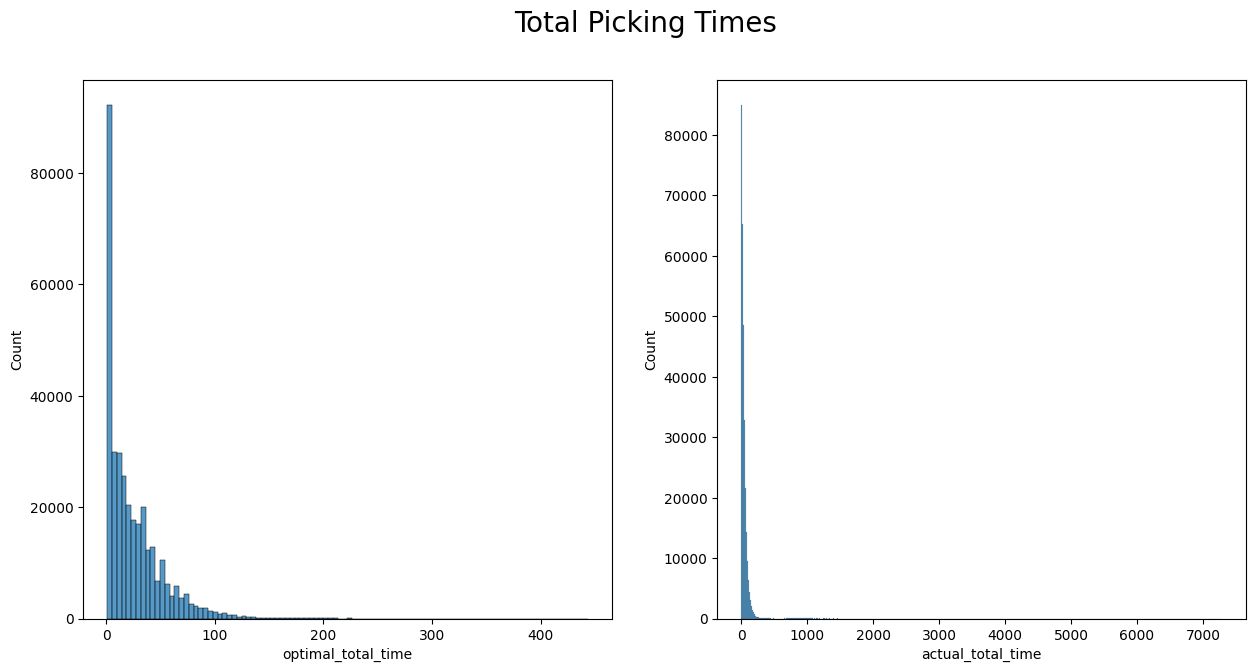

In [160]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=df,x='optimal_total_time', bins=100)
plt.subplot(122)
sb.histplot(data=df,x='actual_total_time', bins=500)
fig.suptitle("Total Picking Times", fontsize=20)
plt.show()

##### Delay times

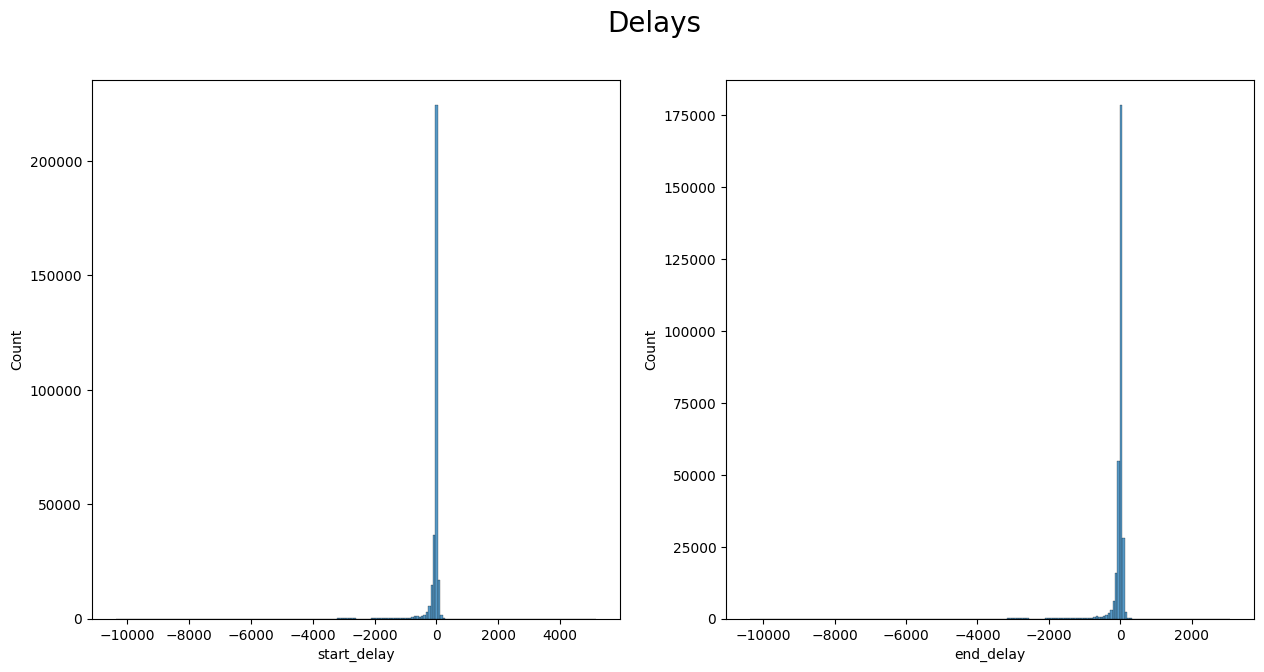

In [163]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=df,x='start_delay', bins=200)
plt.subplot(122)
sb.histplot(data=df,x='end_delay', bins=200)
fig.suptitle("Delays", fontsize=20)
plt.show()

<Axes: xlabel='diff_actual_optimal_time', ylabel='Count'>

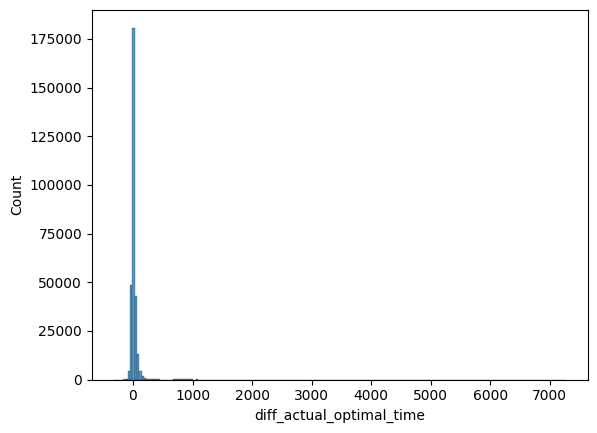

In [18]:
sb.histplot(data=df,x='diff_actual_optimal_time', bins=200)

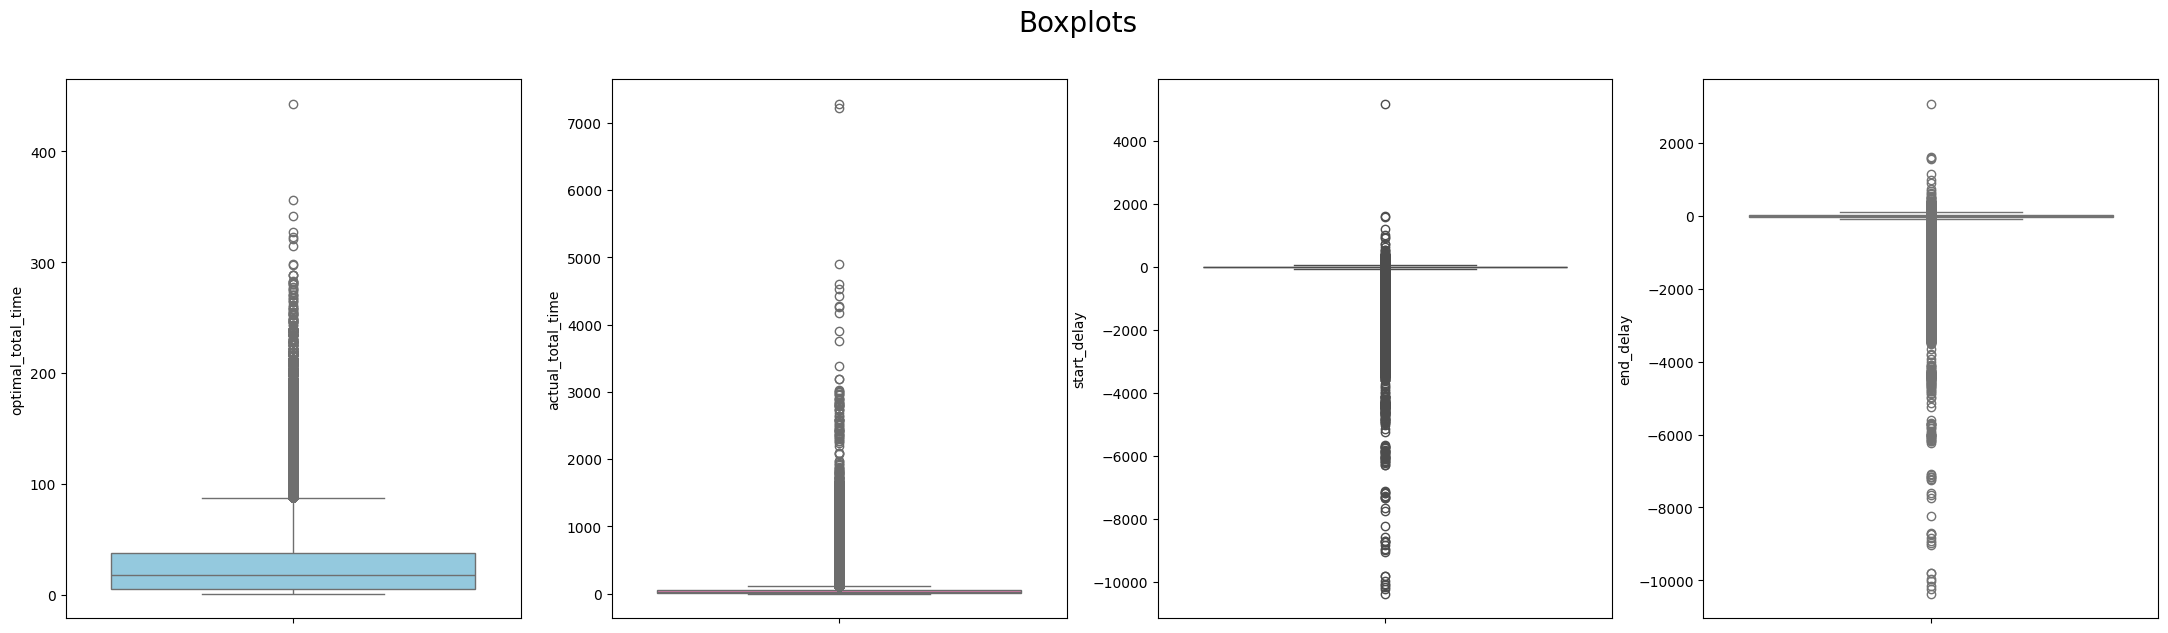

In [168]:
fig, ax = plt.subplots(1, 4, figsize=(27,7))
plt.subplot(141)
sb.boxplot(df['optimal_total_time'], color='skyblue')
plt.subplot(142)
sb.boxplot(df['actual_total_time'], color='hotpink')
plt.subplot(143)
sb.boxplot(df['start_delay'], color='yellow')
plt.subplot(144)
sb.boxplot(df['end_delay'], color='lightgreen')
fig.suptitle("Boxplots", fontsize=20)
plt.show()

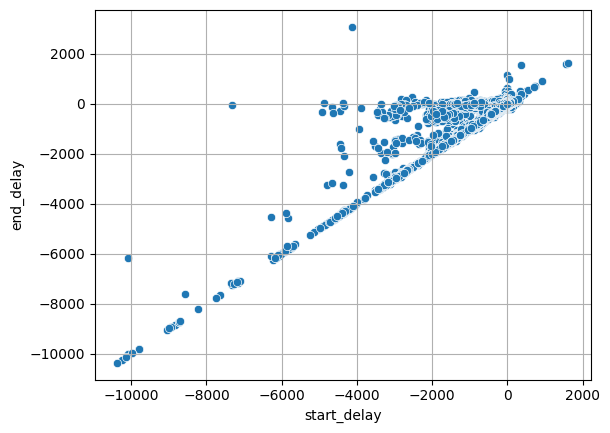

In [191]:
sb.scatterplot(data=df, x=df["start_delay"], y=df["end_delay"])
plt.grid()
plt.show()

#### 4.2 Visualize data by store_id

<Axes: ylabel='total_orders'>

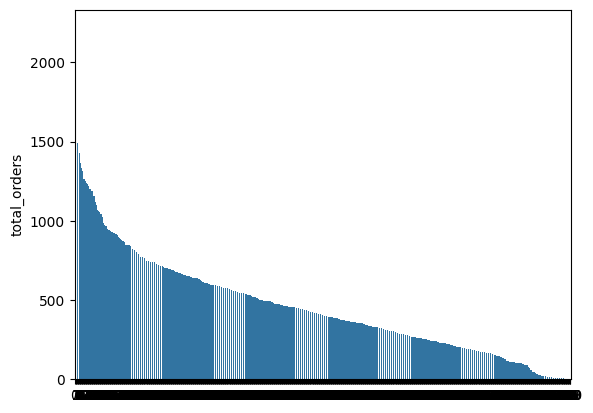

In [101]:
sb.barplot(df_store_agg["total_orders"].sort_values(ignore_index=True, ascending=False))

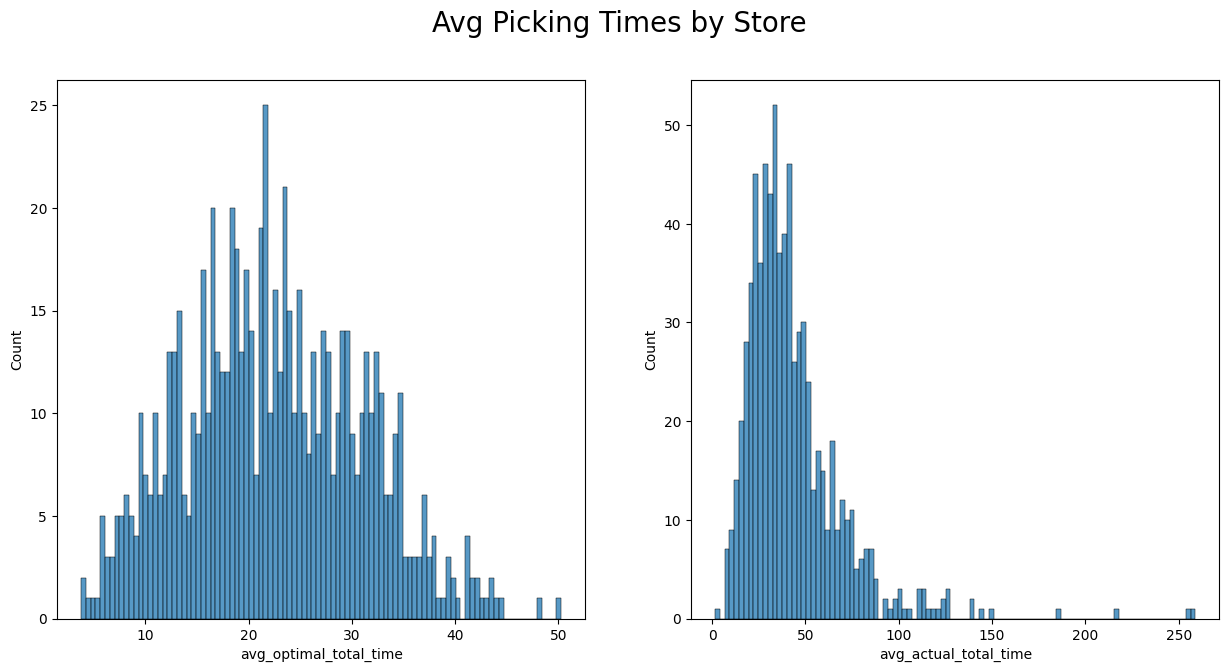

In [171]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=df_store_agg,x='avg_optimal_total_time', bins=100)
plt.subplot(122)
sb.histplot(data=df_store_agg,x='avg_actual_total_time', bins=100)
fig.suptitle("Avg Picking Times by Store", fontsize=20)
plt.show()

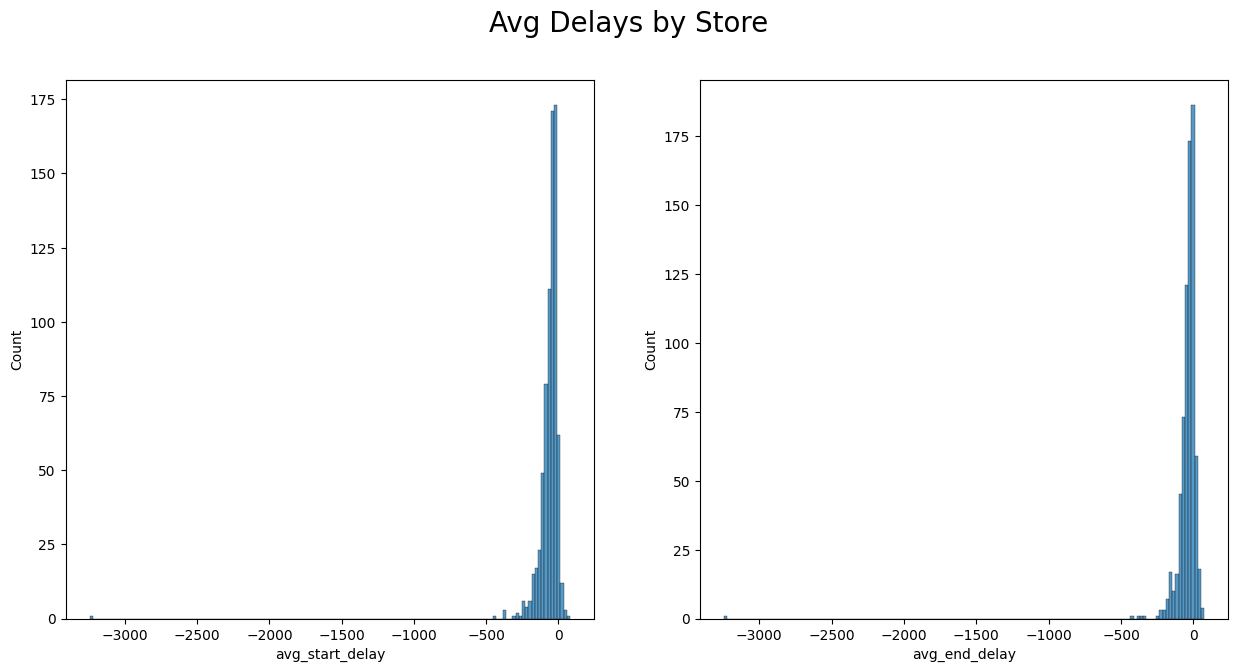

In [172]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=df_store_agg,x='avg_start_delay', bins=150)
plt.subplot(122)
sb.histplot(data=df_store_agg,x='avg_end_delay', bins=150)
fig.suptitle("Avg Delays by Store", fontsize=20)
plt.show()

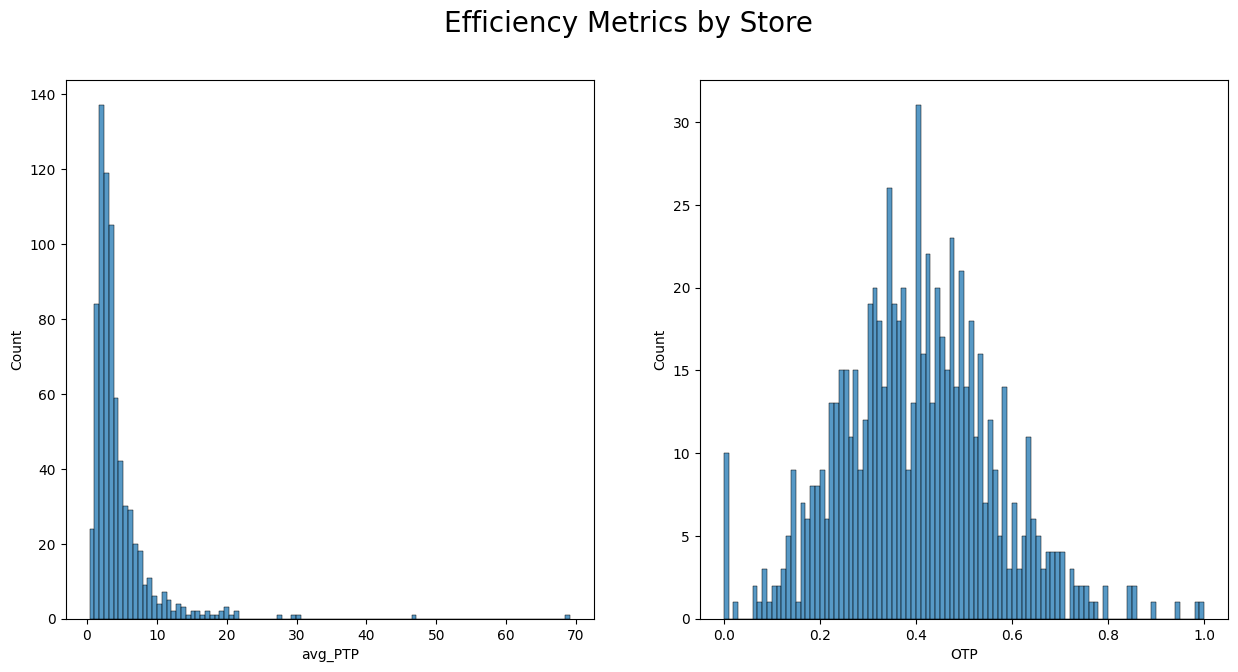

In [174]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=df_store_agg,x='avg_PTP', bins=100)
plt.subplot(122)
sb.histplot(data=df_store_agg,x='OTP', bins=100)
fig.suptitle("Efficiency Metrics by Store", fontsize=20)
plt.show()

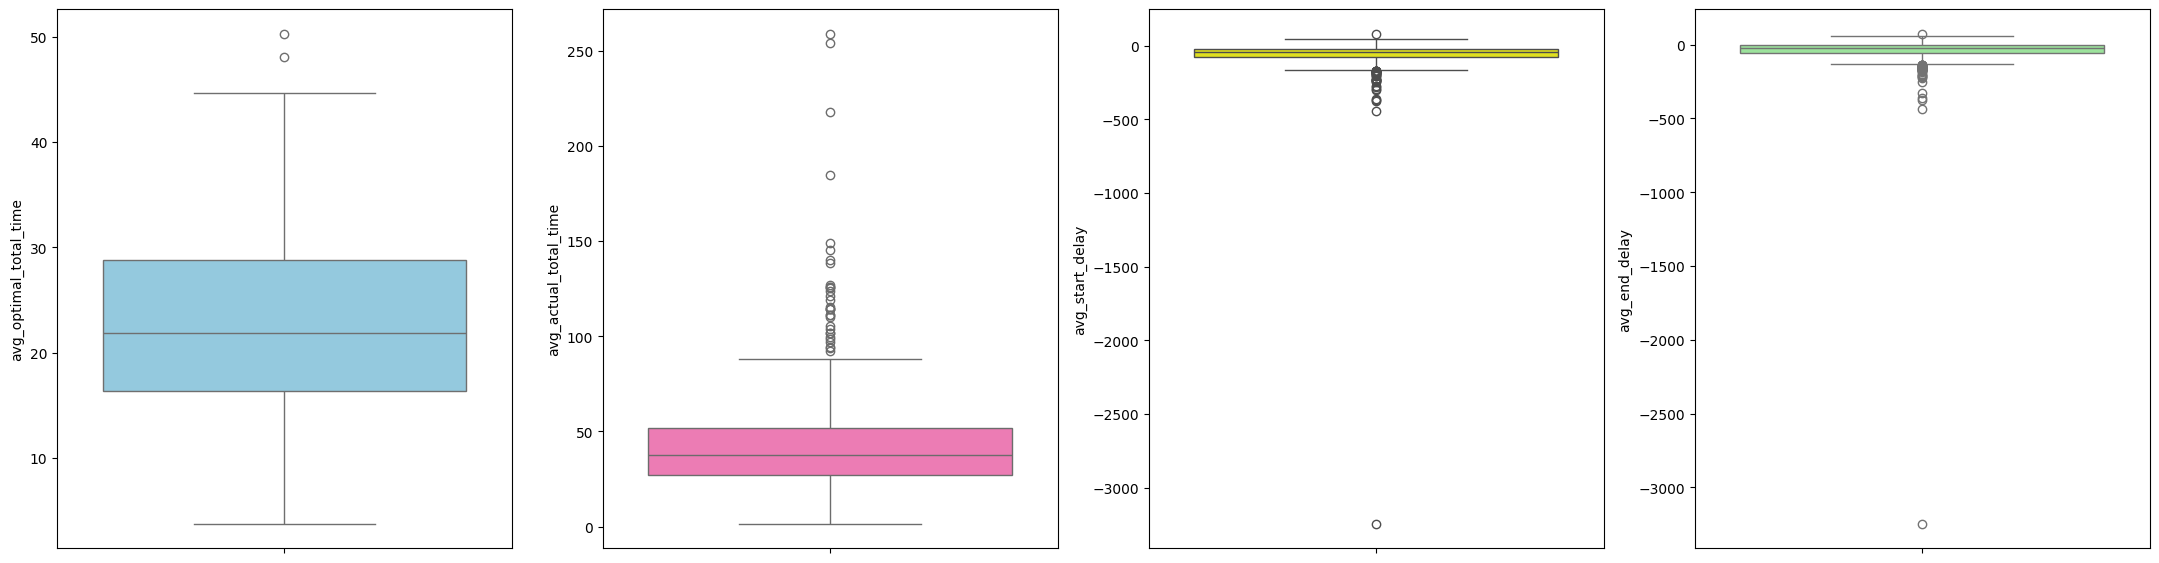

In [176]:
fig, ax = plt.subplots(1, 4, figsize=(27,7))
plt.subplot(141)
sb.boxplot(df_store_agg['avg_optimal_total_time'], color='skyblue')
plt.subplot(142)
sb.boxplot(df_store_agg['avg_actual_total_time'], color='hotpink')
plt.subplot(143)
sb.boxplot(df_store_agg['avg_start_delay'], color='yellow')
plt.subplot(144)
sb.boxplot(df_store_agg['avg_end_delay'], color='lightgreen')
plt.show()

### 5. Time series analysis

In [103]:
df_by_date = df.groupby(df['optimal_start_time_picking'].dt.date)

df_date_agg = df_by_date.aggregate(
    num_stores = pd.NamedAgg(column="store_id", aggfunc="nunique"),
    num_orders = pd.NamedAgg(column="optimal_total_time", aggfunc="count"),
    avg_actual_total_time=pd.NamedAgg(column="actual_total_time", aggfunc="mean"),
    avg_optimal_total_time=pd.NamedAgg(column="optimal_total_time", aggfunc="mean"),
    avg_diff_actual_optimal_time=pd.NamedAgg(column="diff_actual_optimal_time", aggfunc="mean"),
    avg_start_delay=pd.NamedAgg(column="start_delay", aggfunc="mean"),
    avg_end_delay=pd.NamedAgg(column="end_delay", aggfunc="mean"),
    avg_PTP=pd.NamedAgg(column="PTP", aggfunc="mean"),
)

df_date_agg.index.names = ["date"]
df_date_agg.reset_index(inplace=True)
df_date_agg

,date,num_stores,num_orders,avg_actual_total_time,avg_optimal_total_time,avg_diff_actual_optimal_time,avg_start_delay,avg_end_delay,avg_PTP
0,2024-02-28,2,2,4.447225,2.500000,1.947225,-121.329642,-119.382417,1.677985
1,2024-02-29,668,4178,43.646723,29.067975,13.942590,-54.599741,-42.748086,3.245043
2,2024-03-01,722,28538,44.611323,24.723842,18.337291,-32.961004,-16.780491,3.831940
3,2024-03-02,716,29622,46.399936,26.655020,18.577660,-49.782467,-32.159408,3.779090
4,2024-03-03,720,26993,47.453387,29.275368,17.295985,-50.098777,-33.235105,3.332113
5,2024-03-04,719,24089,46.230380,26.712981,18.910026,-53.746047,-35.570762,3.471795
6,2024-03-05,718,22760,46.639002,24.857909,21.211064,-64.575530,-43.703196,4.071839
7,2024-03-06,715,22255,43.918907,23.435183,19.610280,-59.385796,-40.652971,4.220174
8,2024-03-07,724,21492,43.874508,23.805695,19.175602,-63.248289,-44.501374,4.377921
9,2024-03-08,717,26085,44.449352,22.905041,19.975649,-49.072623,-31.846481,4.227673


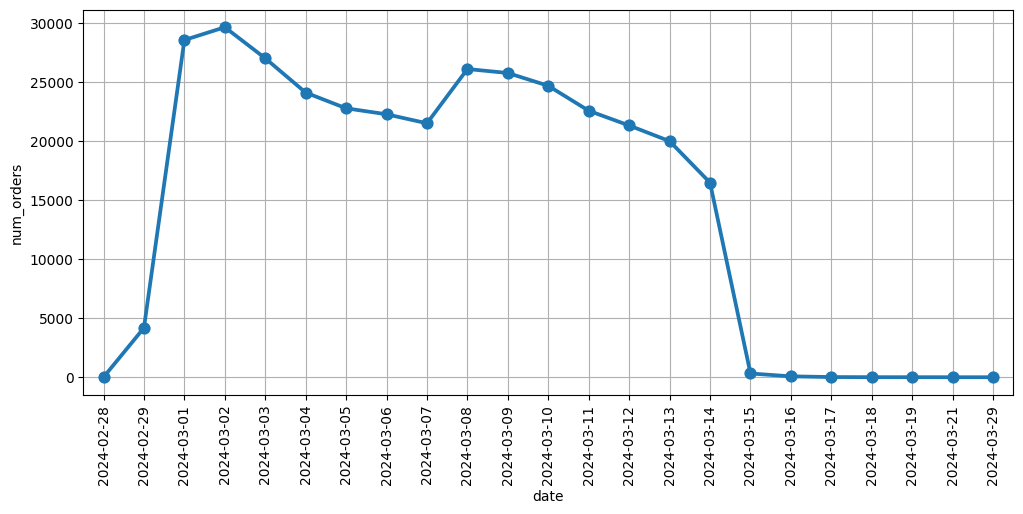

In [178]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
sb.pointplot(x=df_date_agg["date"],y=df_date_agg["num_orders"])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
sb.pointplot(x=df_date_agg["date"], y=df_date_agg["avg_actual_total_time"])
sb.pointplot(x=df_date_agg["date"], y=df_date_agg["avg_optimal_total_time"])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
sb.pointplot(x=df_date_agg["date"], y=df_date_agg["avg_start_delay"])
sb.pointplot(x=df_date_agg["date"], y=df_date_agg["avg_end_delay"])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
sb.pointplot(x=df_date_agg["date"], y=df_date_agg["avg_PTP"])
plt.xticks(rotation=90)
plt.grid()
plt.show()

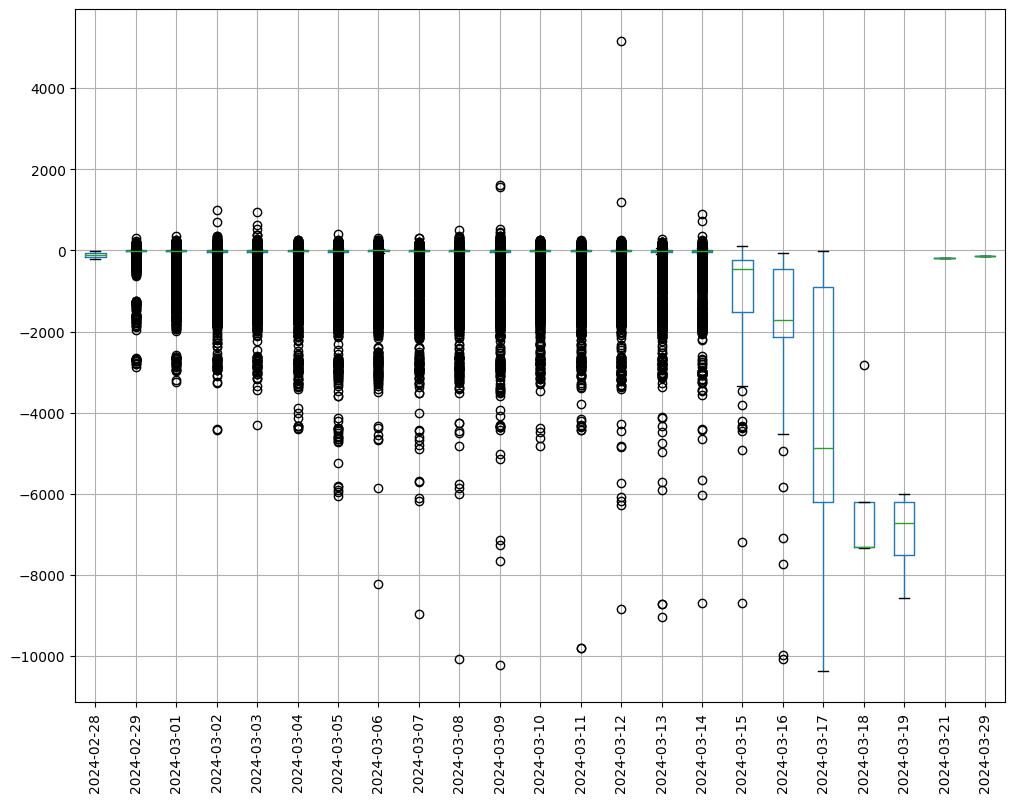

In [154]:
fig, ax = plt.subplots(1,1,figsize=(12,9))
df_by_date.boxplot(subplots=False, column="start_delay")
xticks = ax.get_xticks()
plt.xticks(ticks=xticks, labels=[str(date) for date in df_by_date.groups.keys()], rotation=90)
# plt.ylabel("PTP")
plt.show()

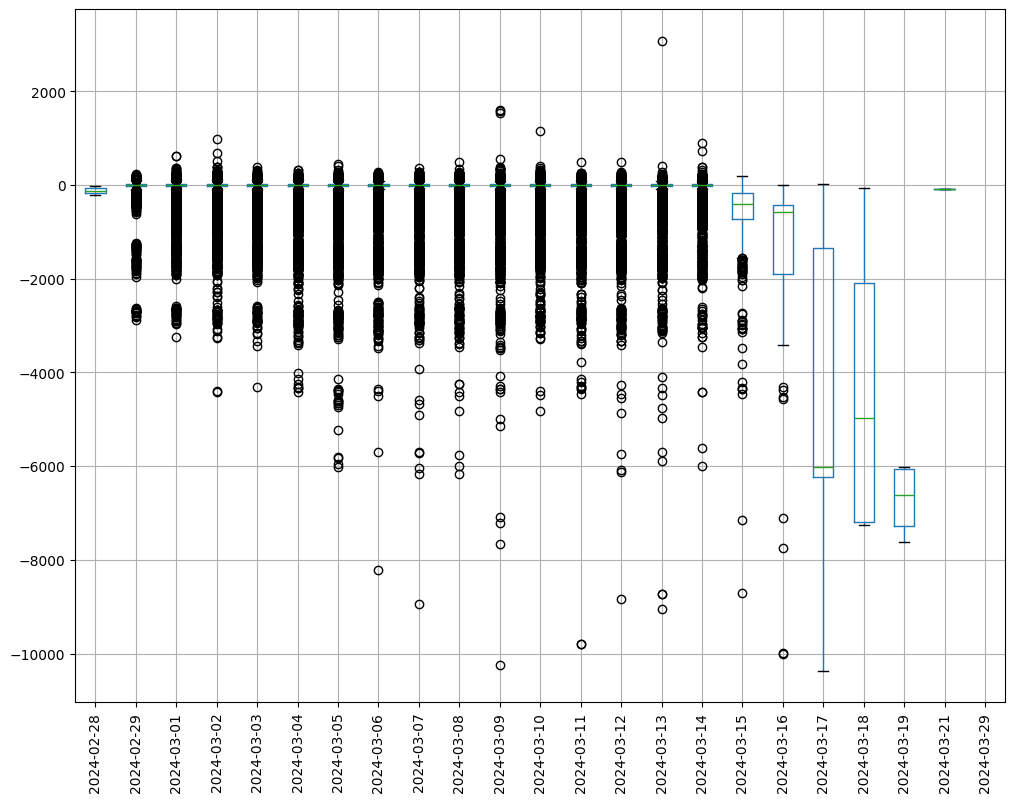

In [155]:
fig, ax = plt.subplots(1,1,figsize=(12,9))
df_by_date.boxplot(subplots=False, column="end_delay")
xticks = ax.get_xticks()
plt.xticks(ticks=xticks, labels=[str(date) for date in df_by_date.groups.keys()], rotation=90)
# plt.ylabel("PTP")
plt.show()